In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from src.paths import processed_data_path,repo_path

In [2]:
#IMAU Data
ds_imau = xr.open_dataset(f'{processed_data_path}IMAU_Output/imau_station_data.nc')
ds_imau = ds_imau.rename({'zs':'cum_ele'})
#CFM Output
results_path = f'{repo_path}CFM_Lancaster/results/reformatted_output/Single_Dimension_CFM_Output.nc'
ds_single_dimension_outputs = xr.open_dataset(results_path)

FileNotFoundError: [Errno 2] No such file or directory: b'/home/jez/Community_Firn_Model_Forked/CFM_Lancaster/results/reformatted_output/Single_Dimension_CFM_Output.nc'

NameError: name 'ds_single_dimension_outputs' is not defined

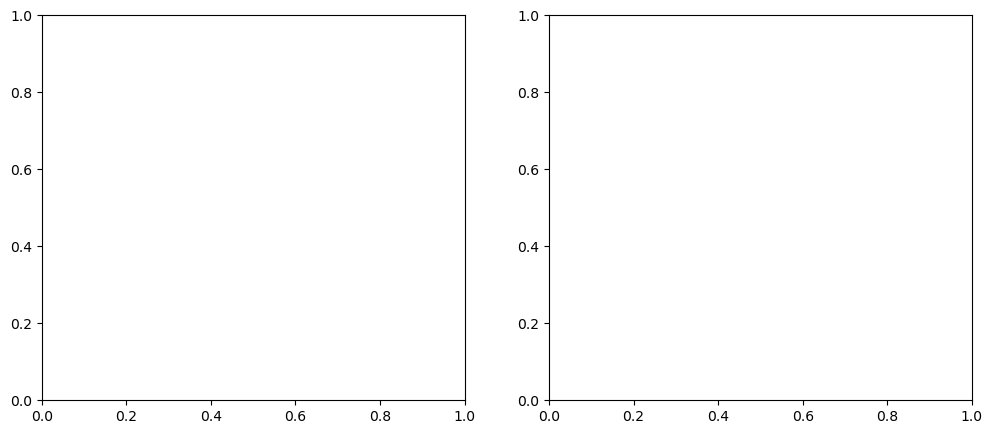

In [3]:
stations = ['Summit','Kan-M']
output = 'cum_ele'
output_fullname = 'Cumulative Elevation Change / m'

fig, subplots = plt.subplots(1, 2,figsize=(12,5))
for ax,station in zip(subplots.flat,stations):
    ds_single_dimension_outputs[output].isel(time=slice(1,None)).sel(station=station).plot.line(x='year',alpha=0.6,ax=ax,label='CFM')
    ds_imau[output].isel(time=slice(1,None)).sel(station=station).plot.line(x='time',alpha=0.6,ax=ax,label='IMAU')
    ax.set_title(station)
    ax.set_ylabel(output_fullname)
    ax.set_xlabel('Year')
    ax.legend()
fig.tight_layout()

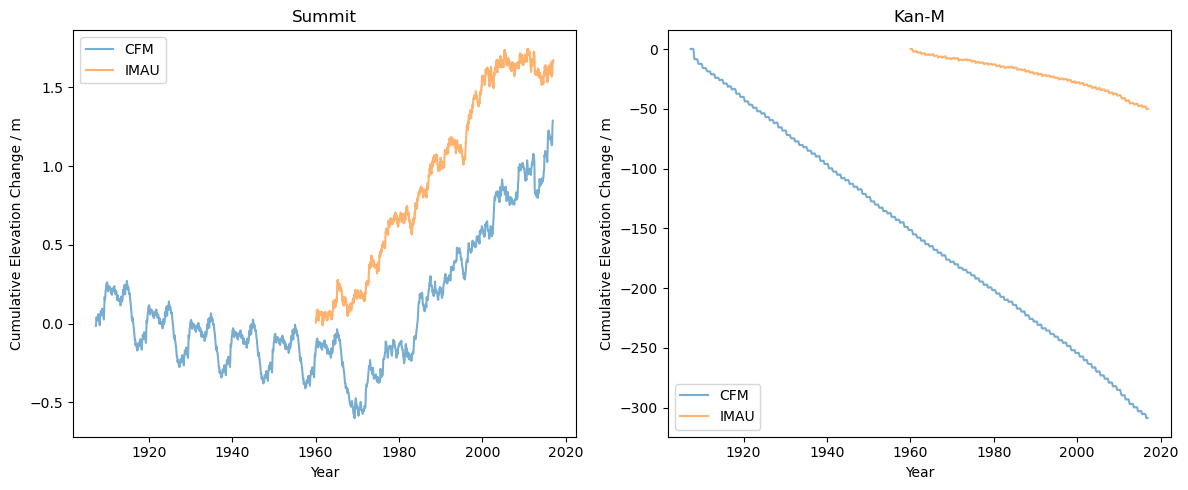

In [3]:
stations = ['Summit','Kan-M']
output = 'cum_ele'
output_fullname = 'Cumulative Elevation Change / m'

fig, subplots = plt.subplots(1, 2,figsize=(12,5))
for ax,station in zip(subplots.flat,stations):
    ds_single_dimension_outputs[output].isel(time=slice(1,None)).sel(station=station).plot.line(x='year',alpha=0.6,ax=ax,label='CFM')
    ds_imau[output].isel(time=slice(1,None)).sel(station=station).plot.line(x='time',alpha=0.6,ax=ax,label='IMAU')
    ax.set_title(station)
    ax.set_ylabel(output_fullname)
    ax.set_xlabel('Year')
    ax.legend()
fig.tight_layout()

In [30]:
ds_single_dimension_outputs_spin = ds_single_dimension_outputs.where((1960<=ds_single_dimension_outputs.year)&(ds_single_dimension_outputs.year<=1970),drop=True)
ds_single_dimension_outputs_spin['steady_state_ele_change'] = ds_single_dimension_outputs_spin['delta_ele']+ds_single_dimension_outputs_spin['tot_compaction']
# ds_single_dimension_outputs_spin['steady_state_ele_change'] = ds_single_dimension_outputs_spin['delta_ele']-ds_single_dimension_outputs_spin['cum_tot_compaction']

> Total Elevation Change = Elevation Change due to Compaction + Elevation Change due to Melt & Snowfall

Each time step there's a compaction stage and then a melt/snowfall stage and the elevation change due to both can be separated. In most firn modelling an assumption is made that the elevation change in the spin-up period due to compaction/melt/snowfall is balanced out by an elevation change due to horizontal divergence of ice flow at the location. In other words the elevation during the reference period does not change and the firn column is in equilibrium. This horizontal divergence is then assumed constant over the future period as well, while compaction/melt/snowfall are evolved according to some climate models predictions. 

> Horizontal Divergence = - (Average Elevation Change due to Compaction in SpinUP + Average Elevation Change due to Melt & Snowfall in SpinUP)

The above is easy to calculate although, unfortunately the current version of the CFM doesn't calculate total compaction correctly. 

In [ ]:
#NOTE Check delta_ele uncorrected

In [31]:
ds_single_dimension_outputs_spin.mean('time')

<xarray.Dataset>
Dimensions:                         (station: 2)
Coordinates:
  * station                         (station) object 'Summit' 'Kan-M'
Data variables:
    delta_ele                       (station) float32 -0.003436 -0.2213
    cum_ele                         (station) float32 -0.1437 -14.07
    tot_compaction                  (station) float32 -0.02755 -0.001214
    cum_tot_compaction              (station) float32 -1.716 -0.06466
    multiplyer                      (station) float64 60.5 60.5
    corrected_cumulative_elevation  (station) float64 -0.02266 -13.95
    steady_state_ele_change         (station) float32 1.713 -0.1566

In [34]:
#Horizontal Divergence
ds_single_dimension_outputs_spin['steady_state_ele_change'].mean('time')

<xarray.DataArray 'steady_state_ele_change' (station: 2)>
array([ 1.7125926 , -0.15661685], dtype=float32)
Coordinates:
  * station  (station) object 'Summit' 'Kan-M'

In [5]:
#Horizontal Divergence
ds_single_dimension_outputs_spin['steady_state_ele_change'].mean('time')

<xarray.DataArray 'steady_state_ele_change' (station: 2)>
array([-0.03098521, -0.22248983], dtype=float32)
Coordinates:
  * station  (station) object 'Summit' 'Kan-M'

In [6]:
#Horizontal Divergence
ds_single_dimension_outputs_spin['steady_state_ele_change'].mean('time')

<xarray.DataArray 'steady_state_ele_change' (station: 2)>
array([ 0.02411186, -0.016015  ], dtype=float32)
Coordinates:
  * station  (station) object 'Summit' 'Kan-M'

In [41]:
multiplyer_array = np.arange(0,len(ds_single_dimension_outputs.time),1)
ds_single_dimension_outputs['multiplyer'] = (('station', 'time'), np.array([multiplyer_array,multiplyer_array]))
ds_single_dimension_outputs['corrected_cumulative_elevation'] = ds_single_dimension_outputs.cum_ele + 0.01098521 *ds_single_dimension_outputs.multiplyer
# ds_single_dimension_outputs['corrected_cumulative_elevation'] = ds_single_dimension_outputs.cum_ele + 0.1566 *ds_single_dimension_outputs.multiplyer
# ds_single_dimension_outputs['corrected_cumulative_elevation'] = ds_single_dimension_outputs.cum_ele + 0.002 *ds_single_dimension_outputs.multiplyer

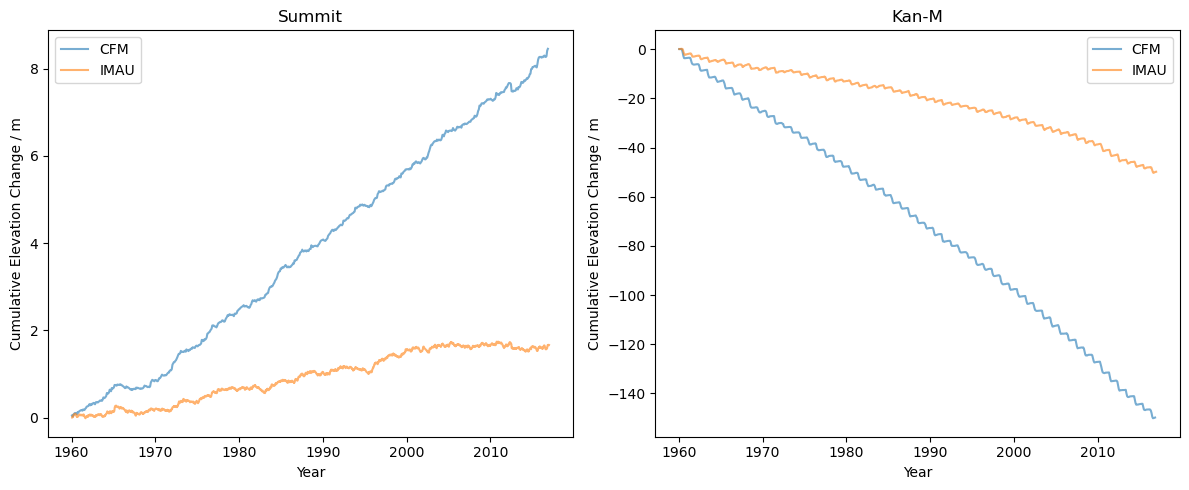

In [42]:
stations = ['Summit','Kan-M']
output = 'cum_ele'
output_fullname = 'Cumulative Elevation Change / m'

fig, subplots = plt.subplots(1, 2,figsize=(12,5))
for ax,station in zip(subplots.flat,stations):
    ds_single_dimension_outputs['corrected_cumulative_elevation'].isel(time=slice(1,None)).sel(station=station).plot.line(x='year',alpha=0.6,ax=ax,label='CFM')
    ds_imau[output].isel(time=slice(1,None)).sel(station=station).plot.line(x='time',alpha=0.6,ax=ax,label='IMAU')
    ax.set_title(station)
    ax.set_ylabel(output_fullname)
    ax.set_xlabel('Year')
    ax.legend()
fig.tight_layout()